In [55]:
#PROJETO FINAL - Importando Dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

df_titanic = pd.read_csv('titanic-data-6.csv')
print('Dados dos Sobreviventes do Titanic')
display(df_titanic.head())

Dados dos Sobreviventes do Titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


O CONJUNTO DE DADOS ACIMA SE REFERE À INDIVIDUOS QUE ESTAVAM A BORDO DO TITANIC.

ABAIXO SEGUE UM PEQUENO RESUMO DAS VARIAVEIS CONTINAS NO ARQUIVO.


Survived = Sobrevivente; 0 = não, 1 = sim
Pclass = Classe do Bilhete; 1 = 1º;  2=2º;  3=3º
sex = Genero	
Age = Idade em Anos	
Sibsp = número de irmãos/conjuges a bordo do titanic	
parch = número de pais/filhos a bordo do titanic	
ticket = número do bilhete	
fare = tarifa do passageiro	
cabin = número da cabine	
embarked = porto de embarcação; C = Cherbourg; Q = Queenstown; S = Southampton

__NOTAS__:

*Pclass - Status Socioeconomico
1º - Alto
2º - Médio
3º - Baixo

*Age - Idade fracionada se for menor que 1.

*Sibsp - O conjunto de dados define relações familiares desta forma:
 *Sibling - irmão/irmã, meio-irmão/meia-irmã
 *Sponse - marido/esposa (amantes e noivas não entram na contagem)

*Parch - O conjunto de dados define relações familiares desta forma;
 *parent - mãe/pai
 *child - filho/filha/enteado/enteada
 **ALgumas crianças viajavam com babá, portanto neste caso "parch=0"

COM BASE NESTE CONJUNTO DE DADOS, AS SEGUINTES QUESTÕES SERÃO ANALISADAS:

•	Quais foram os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver?

•	Mulheres tiveram uma taxa maior de sobrevivência em relação aos homens?

•	Existe alguma relação entre as classes sociais e o número de sobreviventes?

SEGUE ABAIXO O PROCESSO DE AVALIÇÃO E LIMPEZA DOS DADOS

In [69]:
#Criando um Função para Analisar os dados
def analise(data):
    """
    Parametro: Insira o DataFrame que deseja analisar
    Return: Retorna a análise dos itens contidos na função
    """
    
    amostras = data.shape[0]
    colunas = data.shape[1]
    
    duplicadas = data.duplicated().sum()
    
    tipo = data.dtypes
    
    faltantes = data.isnull().sum()
    
    unicos = data.nunique()
    
    return [print('O número de amostras é de {0} e o número de colunas é de {1}.\n\nExistem {2} linhas duplicadas no DataFrame.\n\nTipos de dados do DataFrame:\n\n{3}\n\nValores Faltantes no DataFrame:\n\n{4}\n\nValores Unicos no DataFrame:\n\n{5}\n\n'.format(
        amostras, colunas, duplicadas, tipo, faltantes, unicos))]


O propósito da função "Analise" é fazer a análise inical do DataFrame. São checados nessa função o número de amostra e colunas, a existencia de valores duplicados, o tipos das variaveis, a existencia de valores faltantes e a quantidade de valores únicos.

In [70]:
#Analisando os dados
print(analise(df_titanic))

O número de amostras é de 891 e o número de colunas é de 12.

Existem 0 linhas duplicadas no DataFrame.

Tipos de dados do DataFrame:

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Valores Faltantes no DataFrame:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Valores Unicos no DataFrame:

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


[None]


In [7]:
#Renomear as colunas para minusculo
df_titanic.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

#Confirmando
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#preenchendo colunas com valores faltantes
mean = df_titanic['age'].mean()
df_titanic['age'].fillna(mean, inplace=True)

#confirmando
df_titanic.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [9]:
#apagando colunas irrelevantes
df_titanic.drop(['cabin','ticket', 'fare', 'embarked'], axis=1, inplace=True)

#confirmando
df_titanic.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
dtype: int64

In [10]:
#salvando as alterações
df_titanic.to_csv('data_titanic.csv', index=False)

__LIMPEZA DOS DADOS__

•	Avaliar os dados – foi checado a quantidade de amostra e colunas do conjunto de dados, bem como os tipos dos dados de cada coluna. Também foi analisado se havia valores faltantes, linhas duplicadas e valores únicos.

•	Tratamento dos dados – no tratamento dos dados foi feita a substituição dos rótulos das colunas, mantendo os nomes     originais, porém convertendo os nomes para caixa baixa e eliminando underlines.

Foi constatado que na coluna “age” havia valores faltantes. Para resolver esse problema foi calculada a média dos valores de idade e esse valor foi utilizado para preenchimento das linhas em branco na coluna “age”.

As colunas que apresentavam valores irrelevantes ou que não ofereciam contribuição relevante para a analise foram descartas. Essas colunas foram “cabin”, “ticket”, “fare” e “embarked”.

•	Após o limpeza dos dados, os mesmo foram salvos em um novo conjunto, denominado "data_titanic.csv


In [11]:
#importando novo conjunto de dados
df_titan = pd.read_csv('data_titanic.csv')
print('Dados do Titanic')
display(df_titan.head())

Dados do Titanic


,passengerid,survived,pclass,name,sex,age,sibsp,parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0


In [68]:
#Analisando o novo DataFrame
print(analise(df_titan))

O número de amostras é de 891 e o número de colunas é de 8.

Existem 0 linhas duplicadas no DataFrame.

Tipos de dados do DataFrame:

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
dtype: object

Valores Faltantes no DataFrame:

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
dtype: int64

Valores Unicos no DataFrame:

passengerid    891
survived         2
pclass           3
name           891
sex              2
age             89
sibsp            7
parch            7
dtype: int64


[None]


In [12]:
# dividindo as pessoas em classes sociais
class_3 = df_titan.query('pclass == "3"')
class_2 = df_titan.query('pclass == "2"')
class_1 = df_titan.query('pclass == "1"')

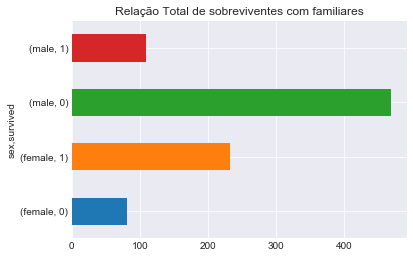

In [13]:
#contagem total de sobrevivente agrupados por sexo e quantidade de familiares
df_titan.groupby(['sex', 'survived']).count()['sibsp'].plot(kind='barh', grid=True, title='Relação Total de sobreviventes com familiares')

O gráfico acima ilustra a relação de homens e mulheres que possuíam familiares a bordo.
Podemos notar que o número de mulheres com familiares que sobreviveram é bem maior em relação ao número de homens.

Os gráficos abaixo ilustram a mesma analise feita acima, no entanto, nestes casos as pessoas foram agrupadas em classes sócias.

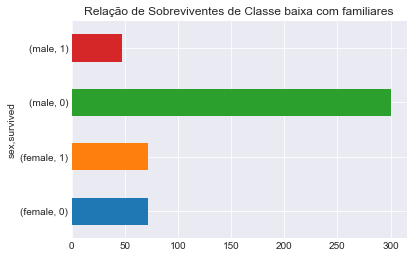

In [15]:
#Contagem de sobreviventes de classe baixa agrupados por sexo e quantidade de irmãos
class_3.groupby(['sex','survived']).count()['sibsp'].plot(kind='barh', title='Relação de Sobreviventes de Classe baixa com familiares')

Aqui temos a relação de indivíduos de Classe baixa que possuíam parentes a bordo.

Neste caso, temos 72 mulheres que sobreviveram e 72 que não. Enquanto que com os homens há 300 não sobreviventes contra 47 que sairam com vida.

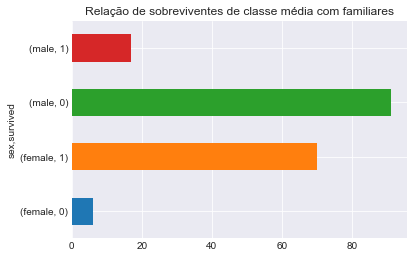

In [16]:
#Contagem de sobreviventes de classe média agrupados por sexo e quantidade de irmãos/cônjuges
class_2.groupby(['sex', 'survived']).count()['sibsp'].plot(kind='barh', title='Relação de sobreviventes de classe média com familiares')

Aqui temos a relação de indivíduos de Classe média que possuíam parentes a bordo.

É possivel notar que houveram muito mais mulheres sobreviventes em relação à classe baixa. 70 sobreviventes contra apenas 6 não sobreviventes.

Com os homens a situação é similar à classe baixa. 91 não sobreviventes contra 17 sobreviventes. Embora os números seja menores a diferença continua sendo ampla.

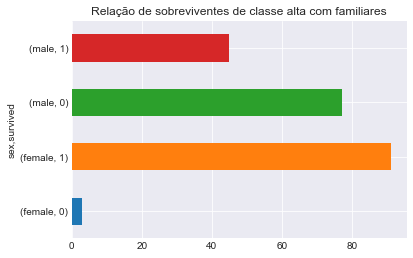

In [17]:
#Contagem de sobreviventes de classe alta agrupados por sexo e quantidade de familiares
class_1.groupby(['sex','survived']).count()['sibsp'].plot(kind='barh', title='Relação de sobreviventes de classe alta com familiares')

Aqui temos a relação de indivíduos de Classe Alta que possuíam parentes a bordo.

Entre os indivíduos de classe alta, os resultados foram mais positivos. Das 94 mulheres, 91 sobreviveram. Enquanto com os homens o número foi de 77 sobreviventes contra 45 não sobreviventes.

É possível notar que o número de indivíduos de classe baixa que não sobreviveram é muito maior em relação às classes média e alta.

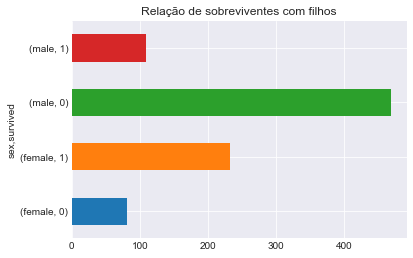

In [18]:
df_titan.groupby(['sex','survived']).count()['parch'].plot(kind='barh', title='Relação de sobreviventes com filhos')

O gráfico acima ilustra a relação de homens e mulheres que possuíam filhos/pais a bordo.
Assim como no grafico que relaciona os familiares a bordo, podemos notar que o número de mulheres com familiares que sobreviveram é bem maior em relação ao número de homens.

Os gráficos abaixo ilustram a mesma analise feita acima, no entanto, novamente nestes casos as pessoas foram agrupadas em classes sócias.

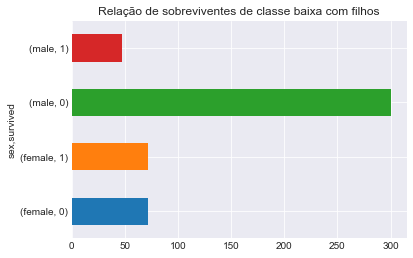

In [19]:
#Contagem de sobreviventes de classe baixa agrupados por sexo e quantidade se filhos/enteados
class_3.groupby(['sex','survived']).count()['parch'].plot(kind='barh', title='Relação de sobreviventes de classe baixa com filhos')

Aqui temos a relação de indivíduos de Classe Baixa que possuíam filhos/pais a bordo.

Assim como ocorre no grafico que relaciona os sobreviventes de classe baixa com parentes a bordo, aqui há um número igual de mulheres sobreviventes e nao sobreviventes, 72 para cada caso. Enquanto que com os homens o número foi de 300 não sobreviventes contra 47 sobreviventes.

Os valores são absolutamente identicos à relação de sobreviventes de classe baixa com parentes à bordo.

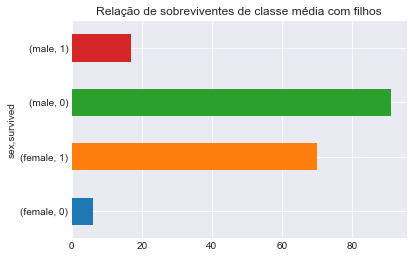

In [20]:
#Contagem de sobreviventes de classe média agrupados por sexo e quantidade se filhos/enteados
class_2.groupby(['sex','survived']).count()['parch'].plot(kind='barh', title='Relação de sobreviventes de classe média com filhos')

Aqui temos a relação de indivíduos de Classe Média que possuíam filhos/pais a bordo.

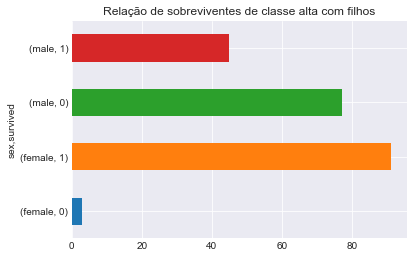

In [21]:
#Contagem de sobreviventes de classe alta agrupados por sexo e quantidade se filhos/enteados
class_1.groupby(['sex','survived']).count()['parch'].plot(kind='barh', title='Relação de sobreviventes de classe alta com filhos')

Aqui temos a relação de indivíduos de Classe Alta que possuíam filhos/pais a bordo.

Em ambas as classes sociais, o número de homens e mulheres sobreviventes é igual tanto para o agrupamento de pessoas com parentes a bordo, quanto para o agrupamento de pessoas com filhos.

Possivelmente estes numeros se referem a exatamente os mesmo individuos.

In [22]:
#Contando o numero de sobreviventes
suv_total = df_titan.query('survived == "1"')
suv_total.count()['survived']

342

In [23]:
#proporção de sobreviventes
suv_perc = (suv_total.count()['survived'] / df_titan.count()['survived']) * 100
round(suv_perc, 2)

38.38

In [24]:
# Total de homens e mulheres
df_male_total = df_titan.query('sex == "male"')
print(df_male_total.count()['sex'])

df_female_total = df_titan.query('sex == "female"')
print(df_female_total.count()['sex'])

577
314


In [26]:
#proporção de homens e mulheres
df_male_perc = (df_male_total.count()['sex'] / df_titan.count()['sex']) * 100
print(round(df_male_perc, 2))

df_female_perc = (df_female_total.count()['sex'] / df_titan.count()['sex']) * 100
print(round(df_female_perc, 2))

64.76
35.24


In [28]:
#contagem de homens e mulheres sobreviventes
male_suv = df_male_total.query('survived == "1"')
female_suv = df_female_total.query('survived == "1"')

print('Número de homens sobrevivente: {0}\nNúmero de mulheres sobreviventes: {1}'.format(
male_suv.count()['survived'], female_suv.count()['survived']))

Número de homens sobrevivente: 109
Número de mulheres sobreviventes: 233


In [29]:
#proporcão de homens e mulheres sobreviventes
male_suv_perc = (male_suv.count()['survived'] / suv_total.count()['survived']) * 100
female_suv_perc = (female_suv.count()['survived'] / suv_total.count()['survived']) * 100

print('Porcentagem de homens sobreviventes: {0}%\nPorcentagem de mulheres sobreviventes: {1}%'.format(
round(male_suv_perc, 2), round(female_suv_perc, 2)))

Porcentagem de homens sobreviventes: 31.87%
Porcentagem de mulheres sobreviventes: 68.13%


<function matplotlib.pyplot.show>

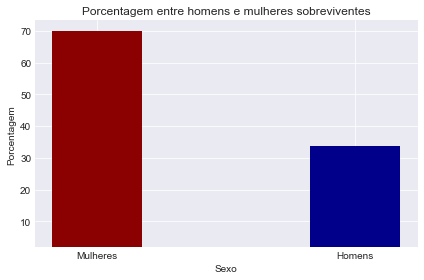

In [30]:
#Porcentagem entre homens e mulheres sobreviventes
locations = [1,2]
heights = [female_suv_perc, male_suv_perc]
labels = ['Mulheres', 'Homens']
colors = ['darkred', 'darkblue']
bar_widht = 0.35
opacity = 1.8

plt.bar(locations, heights, bar_widht, opacity, tick_label=labels, color=colors)
plt.title('Porcentagem entre homens e mulheres sobreviventes')
plt.xlabel('Sexo')
plt.ylabel('Porcentagem')

plt.tight_layout()
plt.show

O gráfico acima ilustra a relação entre homens e mulheres sobreviventes, sem distinção de classe social.

Podemos notar que há um valor aproximado de 70% de sobreviventes do sexo feminino e um valor proximo de 35% de sobreviventes do sexo masculino.
A taxa de mulheres sobreviventes é quase duas vezes maior que a taxa de homens.

In [31]:
#Total de homens e mulheres por classe
df_male_1 = class_1.query('sex == "male"')
df_male_2 = class_2.query('sex == "male"')
df_male_3 = class_3.query('sex == "male"')

df_female_1 = class_1.query('sex == "female"')
df_female_2 = class_2.query('sex == "female"')
df_female_3 = class_3.query('sex == "female"')

print('Total de Homens de classe alta: {0}\nTotal de Homens de classe média: {1}\nTotal de Homens de classe baixa: {2}\n\nTotal de Mulheres de classe alta: {3}\nTotal de Mulheres de classe média: {4}\nTotal de Mulheres de classe baixa: {5}'.format(
df_male_1.count()['sex'], df_male_2.count()['sex'], df_male_3.count()['sex'],
    df_female_1.count()['sex'], df_female_2.count()['sex'], df_female_3.count()['sex']))

Total de Homens de classe alta: 122
Total de Homens de classe média: 108
Total de Homens de classe baixa: 347

Total de Mulheres de classe alta: 94
Total de Mulheres de classe média: 76
Total de Mulheres de classe baixa: 144


In [33]:
#numero de sobreviventes por classe social
male_suv_1 = df_male_1.query('survived == "1"')
male_suv_2 = df_male_2.query('survived == "1"')
male_suv_3 = df_male_3.query('survived == "1"')

female_suv_1 = df_female_1.query('survived == "1"')
female_suv_2 = df_female_2.query('survived == "1"')
female_suv_3 = df_female_3.query('survived == "1"')

print('Homens sobreviventes de classe alta: {0}\nHomens sobreviventes de classe media: {1}\nHomens sobreviventes de classe baixa: {2}\n\nMulheres sobreviventes de classe alta: {3}\nMulheres sobreviventes de classe media: {4}\nMulheres sobreviventes de classe baixa: {5}'.format(
male_suv_1.count()['survived'], male_suv_2.count()['survived'], male_suv_3.count()['survived'], female_suv_1.count()['survived'], 
female_suv_2.count()['survived'], female_suv_3.count()['survived']))

Homens sobreviventes de classe alta: 45
Homens sobreviventes de classe media: 17
Homens sobreviventes de classe baixa: 47

Mulheres sobreviventes de classe alta: 91
Mulheres sobreviventes de classe media: 70
Mulheres sobreviventes de classe baixa: 72


In [34]:
#calculando as proporções totais de sobreviventes dividas em classes sociais
suv_1 = class_1.query('survived == "1"')
suv_2 = class_2.query('survived == "1"')
suv_3 = class_3.query('survived == "1"')

suv_1_perc = (suv_1.count()['survived'] / suv_total.count()['survived']) * 100
suv_2_perc = (suv_2.count()['survived'] / suv_total.count()['survived']) * 100
suv_3_perc = (suv_3.count()['survived'] / suv_total.count()['survived']) * 100

print('Porcentagem de sobreviventes de classe alta: {0}%\nPorcentagem de sobreviventes de classe média: {1}%\nPorcentagem de sobreviventes de classe baixa: {2}%'.format(
round(suv_1_perc, 2), round(suv_2_perc, 2), round(suv_3_perc, 2)))

Porcentagem de sobreviventes de classe alta: 39.77%
Porcentagem de sobreviventes de classe média: 25.44%
Porcentagem de sobreviventes de classe baixa: 34.8%


<function matplotlib.pyplot.show>

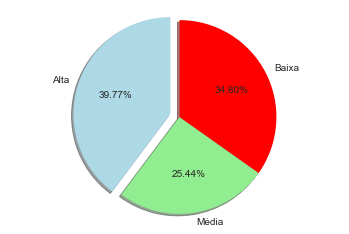

In [35]:
#Porcentagem de sobreviventes por classe social

heights = [suv_1_perc, suv_2_perc, suv_3_perc]
labels = ['Alta', 'Média', 'Baixa']
colors = ['lightblue', 'lightgreen', 'red']
explode = (0.1, 0, 0)

plt.pie(heights, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show

No gráfico acima podemos ver a taxa de sobreviventes sem divisão entre homens e mulheres. 
Indivíduos de classe social alta somam 39,77% dos sobreviventes, seguidos pelos indivíduos pertencentes à classe social baixa, com aproximadamente 35% dos sobreviventes. Por fim, os indivíduos de classe social média representam pouco mais de 25% dos sobreviventes.

In [36]:
#calculando as proporções de sobreviventes divididas entre homens e mulheres
male_perc_1 = (male_suv_1.count()['survived'] / male_suv.count()['survived']) * 100
male_perc_2 = (male_suv_2.count()['survived'] / male_suv.count()['survived']) * 100
male_perc_3 = (male_suv_2.count()['survived'] / male_suv.count()['survived']) * 100

female_perc_1 = (female_suv_1.count()['survived'] / female_suv.count()['survived']) * 100
female_perc_2 = (female_suv_2.count()['survived'] / female_suv.count()['survived']) * 100
female_perc_3 = (female_suv_3.count()['survived'] / female_suv.count()['survived']) * 100

print('Proporção de homens sobreviventes de classe alta: {0}%\nProporção de homens sobreviventes de classe media: {1}%\nProporção de homens sobreviventes de classe baixa: {2}%\n\nProporção de mulheres sobreviventes de classe alta: {3}%\nProporção de mulheres sobreviventes de classe media: {4}%\nProporção de mulheres sobreviventes de classe baixa: {5}%'.format(
    round(male_perc_1, 2),round(male_perc_2, 2),round(male_perc_3, 2), 
    round(female_perc_1, 2),round(female_perc_2, 2),round(female_perc_3, 2)))

Proporção de homens sobreviventes de classe alta: 41.28%
Proporção de homens sobreviventes de classe media: 15.6%
Proporção de homens sobreviventes de classe baixa: 15.6%

Proporção de mulheres sobreviventes de classe alta: 39.06%
Proporção de mulheres sobreviventes de classe media: 30.04%
Proporção de mulheres sobreviventes de classe baixa: 30.9%


<function matplotlib.pyplot.show>

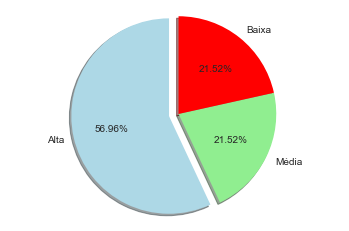

In [37]:
#Porcentagem de homens sobreviventes

heights = [male_perc_1, male_perc_2, male_perc_3]
labels = ['Alta', 'Média', 'Baixa']
colors = ['lightblue', 'lightgreen', 'red']
explode = (0.1, 0, 0)

plt.pie(heights, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show

Aqui é possível notar que, dentre os sobreviventes do sexo masculino, aproximadamente 57% eram de classe social alta, enquanto os indivíduos das classes média e baixa representam pouco mais de 21,5% cada.

<function matplotlib.pyplot.show>

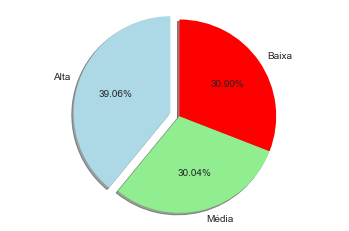

In [38]:
#Porcentagem de mulheres sobreviventes

heights = [female_perc_1, female_perc_2, female_perc_3]
labels = ['Alta', 'Média', 'Baixa']
colors = ['lightblue', 'lightgreen', 'red']
explode = (0.1, 0, 0)

plt.pie(heights, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show

Entre os indivíduos do sexo feminino a diferença é um pouco menor, cerca de 39% dos sobreviventes foram de classe social alta, enquanto as classes média e baixa representam um valor aproximado de 30% cada.

__CONCLUSÃO__

Diante dos resultados apresentados, podemos concluir que pessoas de classe social alta tiveram prioridade no resgate, dado o elevado número de sobreviventes em relação às classes média e baixa.

Também concluímos que houveram muito mais sobreviventes mulheres que homens, independente da classe social. Isso provavelmente se deve ao fato de que mulheres e crianças tem prioridade em situações de resgate.


__LIMITAÇÕES__

Uma dificuldade percebida foi a falta de dados em algumas colunas que continham informações relevantes.
    
Na coluna “age” (idade) dos 891 registros, 177 não continham informações sobre a idade dos passageiros. Com estas informações seria possível determinar se a idade dos indivíduos foi um fator que contribuiu ou não para a sobrevivência.
    
Da mesma forma, a coluna “cabin”, que se refere à identificação da cabine dos passageiros, continha 687 dos 891 registros em branco, o que impossibilita determinar se a posição da cabine no navio foi um fator relevante na sobrevivência dos indivíduos.
